In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 33.0 MB/s eta 0:00:00


In [ ]:
# prompt: auto EDA libraries in python like Sweetviz?

import sweetviz as sv
import pandas as pd

# standard libraries
import pandas as pd
import numpy as np
import os
from google.colab import drive
drive.mount('/content/drive')

# ML/stats
from mlxtend.plotting import heatmap
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
# for splitting the data
from sklearn.model_selection import train_test_split


# visualizations
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns
import plotly.express as px

%matplotlib inline


Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/WIDS-Datathon-2024/Data/Train/'
df = pd.read_csv(path + 'training.csv')
df.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0


In [ ]:
df.describe()

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
count,12906.000000,12906.000000,12906.000000,3941.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,12905.000000,...,12905.000000,12902.000000,12902.000000,12905.000000,12905.000000,12905.000000,12877.000000,12877.000000,12877.000000,12906.000000
mean,547381.196033,573.754300,59.183326,28.984539,20744.441237,1581.950419,40.502259,11.122784,12.945265,13.290376,...,13.335299,13.406950,4.474956,27.978387,8.575284,7.083376,39.822352,7.475221,16.098988,0.624516
std,260404.959974,275.447534,13.335216,5.696906,13886.903756,2966.305306,4.036963,1.512376,1.923974,3.354103,...,3.690949,5.222495,4.837085,5.083939,4.203482,3.109022,3.559492,1.516499,5.842501,0.484266
min,100063.000000,101.000000,18.000000,14.000000,635.545455,0.916667,20.600000,0.000000,6.314286,5.925000,...,4.600000,3.433333,0.000000,12.460784,2.440000,1.200000,30.939316,2.636008,2.760371,0.000000
25%,321517.000000,331.000000,50.000000,24.660000,9463.896552,171.857143,37.129825,10.160000,11.741176,11.013415,...,10.270492,9.663333,0.994444,24.933333,5.618750,4.929688,37.698880,6.651215,11.280694,0.000000
50%,543522.000000,554.000000,59.000000,28.190000,19154.190480,700.337500,40.639344,11.039216,12.923944,12.538095,...,12.884000,12.177778,2.747222,27.788235,7.465714,6.847059,39.108249,7.686577,15.589148,1.000000
75%,772671.750000,846.000000,67.000000,32.920000,30021.278690,1666.515385,42.934783,12.190000,14.019767,14.971053,...,15.555405,16.635556,5.976000,30.709375,10.617442,8.620000,41.136513,8.276922,20.801880,1.000000
max,999896.000000,999.000000,91.000000,85.000000,71374.131580,21172.000000,54.570000,17.675000,35.300000,62.100000,...,35.155556,38.347826,26.755000,48.020000,27.566102,25.200000,52.237210,11.169408,31.504775,1.000000


In [ ]:
df.shape

(12906, 83)

In [ ]:
# prompt: check for duplicate rows in df
df.duplicated().sum()

0

In [ ]:
# prompt: write code to display the columns that have more than 50% null values and  drop columns that have more than 50% null values.
columns_with_more_than_50_percent_null_values = [column for column in df.columns if df[column].isnull().sum() / len(df) > 0.5]

print(columns_with_more_than_50_percent_null_values)

#df.drop(columns_with_more_than_50_percent_null_values, axis=1, inplace=True)

['bmi', 'metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type']


In [ ]:
# prompt: drop only metastatic_first_novel_treatment and metastatic_first_novel_treatment_type columns

df.drop(columns=['metastatic_first_novel_treatment', 'metastatic_first_novel_treatment_type'], axis=1, inplace=True)


In [ ]:
df.shape

(12906, 81)

In [ ]:
# prompt: sweetviz auto EDA for the above dataframe

report = sv.analyze(df)


                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
# Now generate an HTML report file
report.show_html('Sweetviz_Report.html')


Report Sweetviz_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


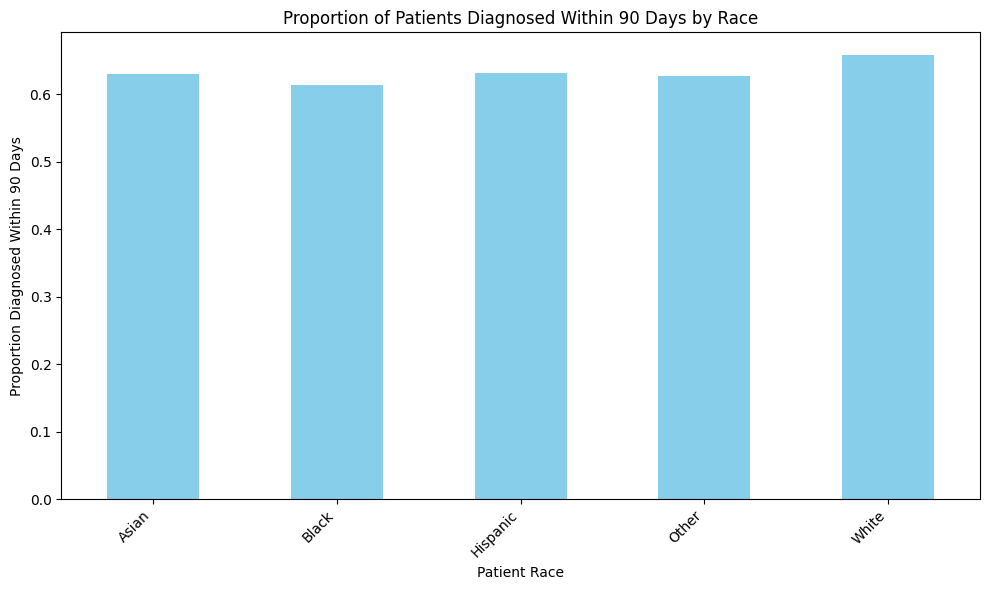

In [ ]:
# Calculate the proportion of patients diagnosed within 90 days for each racial category
race_diagnosis_proportion = df.groupby('patient_race')['DiagPeriodL90D'].mean()

plt.figure(figsize=(10, 6))
race_diagnosis_proportion.plot(kind='bar', color='skyblue')
plt.title('Proportion of Patients Diagnosed Within 90 Days by Race')
plt.xlabel('Patient Race')
plt.ylabel('Proportion Diagnosed Within 90 Days')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

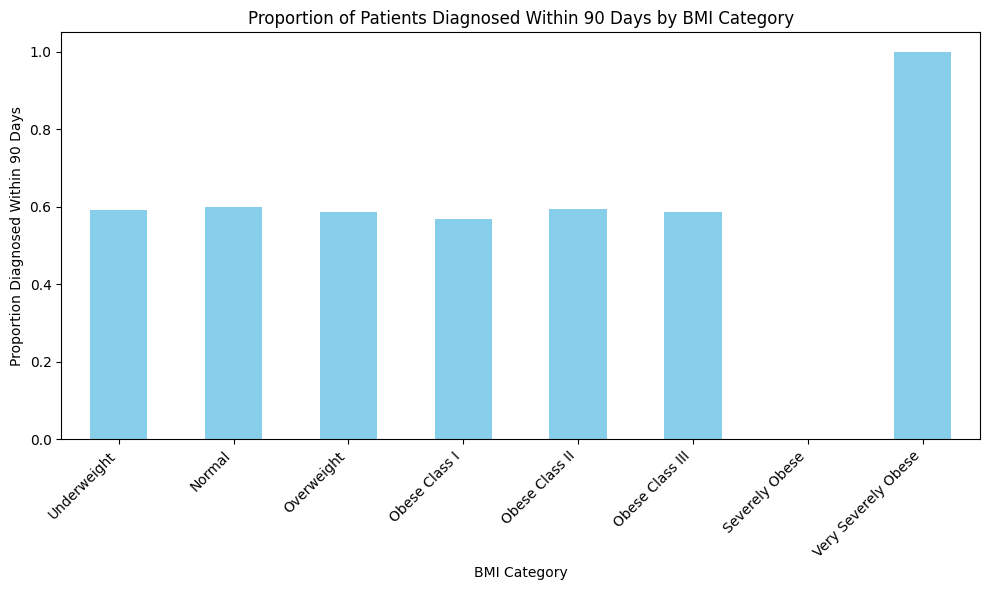

In [ ]:
'''
Underweight: < 18.5
Normal weight: 18.5 - 24.9
Overweight: 25 - 29.9
Obese Class I: 30 - 34.9
Obese Class II: 35 - 39.9
Obese Class III: 40 - 49.9
Severely Obese: 50 - 59.9
Very Severely Obese: 60 and above
'''

# Define BMI categories
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, 49.9, 59.9, float('inf')]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese Class I',
              'Obese Class II', 'Obese Class III', 'Severely Obese',
              'Very Severely Obese']

# Categorize BMI values into bins
df['BMI_Category'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels)

# Calculate the proportion of patients diagnosed within 90 days for each BMI category
bmi_diagnosis_proportion = df.groupby('BMI_Category')['DiagPeriodL90D'].mean()

# Plotting
plt.figure(figsize=(10, 6))
bmi_diagnosis_proportion.plot(kind='bar', color='skyblue')
plt.title('Proportion of Patients Diagnosed Within 90 Days by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Proportion Diagnosed Within 90 Days')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


From the above visualization, it is seen that:

Trend Analysis: It seems that the proportion of patients diagnosed within 90 days is relatively similar across the BMI categories of Underweight, Normal, Overweight, and Obese Classes I, II, and III. This suggests that there isn't a significant difference in diagnosis times within these categories.



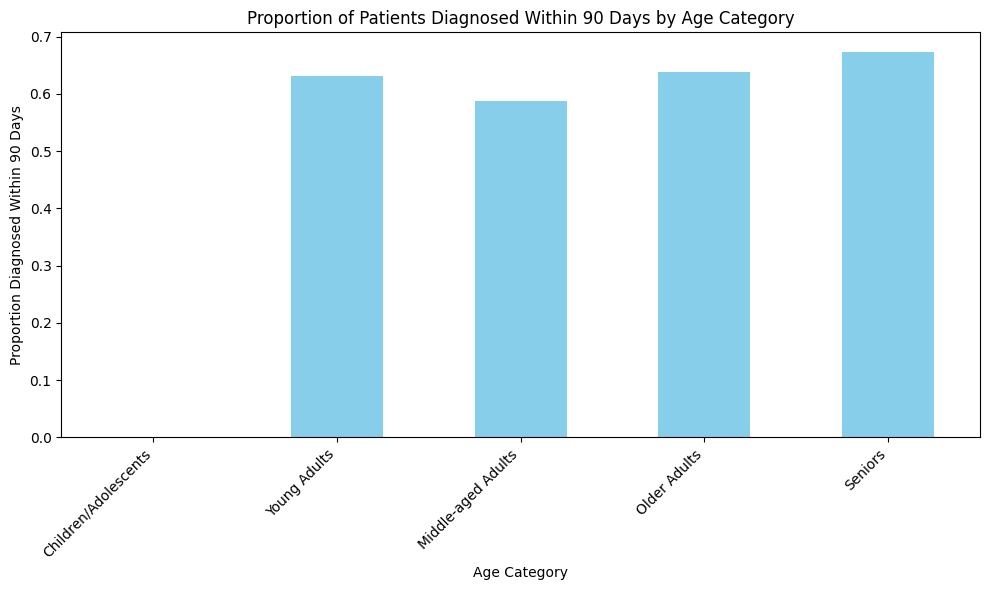

In [ ]:
# Define age categories
age_bins = [0, 17, 35, 55, 75, float('inf')]
age_labels = ['Children/Adolescents', 'Young Adults', 'Middle-aged Adults', 'Older Adults', 'Seniors']

# Categorize age values into bins
df['Age_Category'] = pd.cut(df['patient_age'], bins=age_bins, labels=age_labels)

# Calculate the proportion of patients diagnosed within 90 days for each age category
age_diagnosis_proportion = df.groupby('Age_Category')['DiagPeriodL90D'].mean()

# Plotting
plt.figure(figsize=(10, 6))
age_diagnosis_proportion.plot(kind='bar', color='skyblue')
plt.title('Proportion of Patients Diagnosed Within 90 Days by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Proportion Diagnosed Within 90 Days')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


The bar chart represents the proportion of patients diagnosed within 90 days in different age categories. The age categories displayed are Children/Adolescents, Young Adults, Middle-aged Adults, Older Adults, and Seniors. Here are some observations from the chart:

Diagnosis Proportion Is Fairly Uniform: The proportions across different age groups are quite similar, with each category having a proportion of around 60-70% of patients diagnosed within 90 days.

Slight Variation: Although the differences are small, Young Adults appear to have the highest proportion of diagnoses within 90 days, followed closely by Seniors.

Consistency Across Ages: The consistency of the proportions suggests that age, within this dataset at least, does not show a dramatic impact on the likelihood of being diagnosed within 90 days.

Healthcare Efficiency: The relatively high proportions across all age groups might indicate an efficient healthcare system where most patients are getting diagnosed within a reasonable time frame, regardless of age.

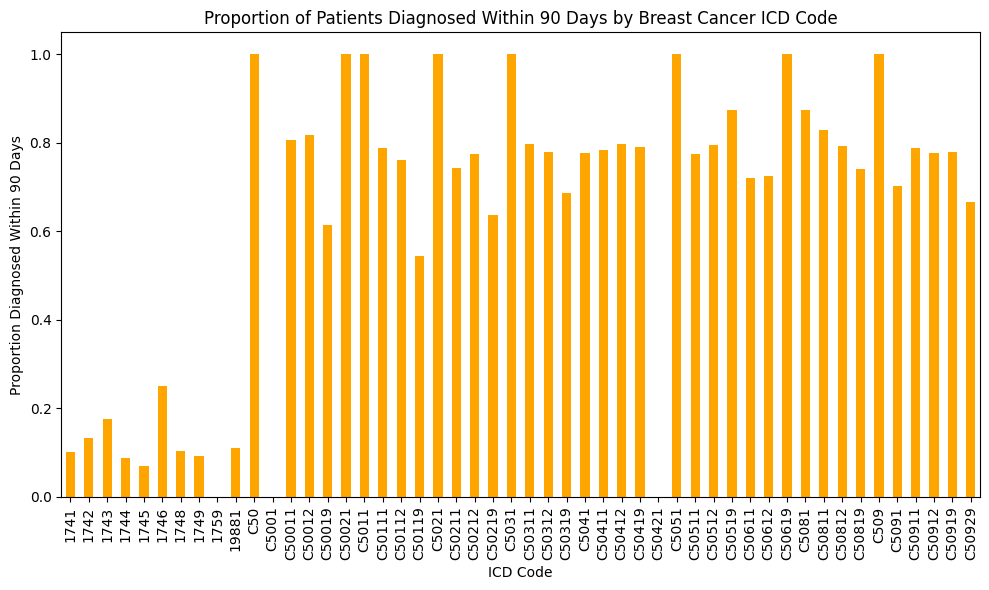

In [ ]:
icd_diagnosis_proportion = df.groupby('breast_cancer_diagnosis_code')['DiagPeriodL90D'].mean()

# Plotting
plt.figure(figsize=(10, 6))
icd_diagnosis_proportion.plot(kind='bar', color='orange')
plt.title('Proportion of Patients Diagnosed Within 90 Days by Breast Cancer ICD Code')
plt.xlabel('ICD Code')
plt.ylabel('Proportion Diagnosed Within 90 Days')
plt.xticks(rotation=90)  # Rotate labels for better readability if there are many codes
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


Variability in Diagnosis Timelines: There's a notable variation in the proportion of patients diagnosed within 90 days among different ICD codes for breast cancer. Some codes have high proportions, suggesting a quicker diagnosis, while others have lower proportions.



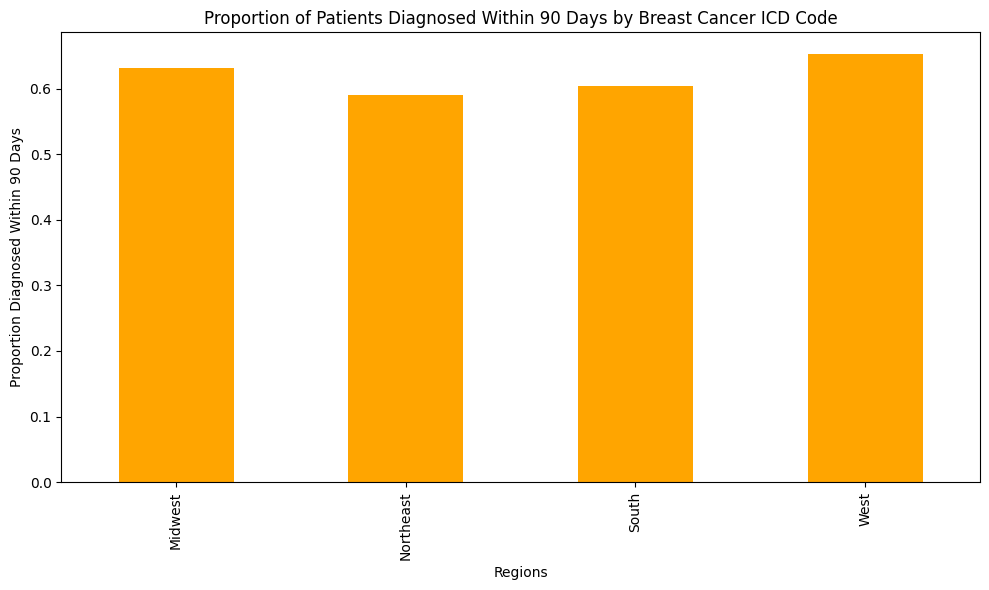

In [ ]:
icd_diagnosis_proportion = df.groupby('Region')['DiagPeriodL90D'].mean()

# Plotting
plt.figure(figsize=(10, 6))
icd_diagnosis_proportion.plot(kind='bar', color='orange')
plt.title('Proportion of Patients Diagnosed Within 90 Days by Breast Cancer ICD Code')
plt.xlabel('Regions')
plt.ylabel('Proportion Diagnosed Within 90 Days')
plt.xticks(rotation=90)  # Rotate labels for better readability if there are many codes
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


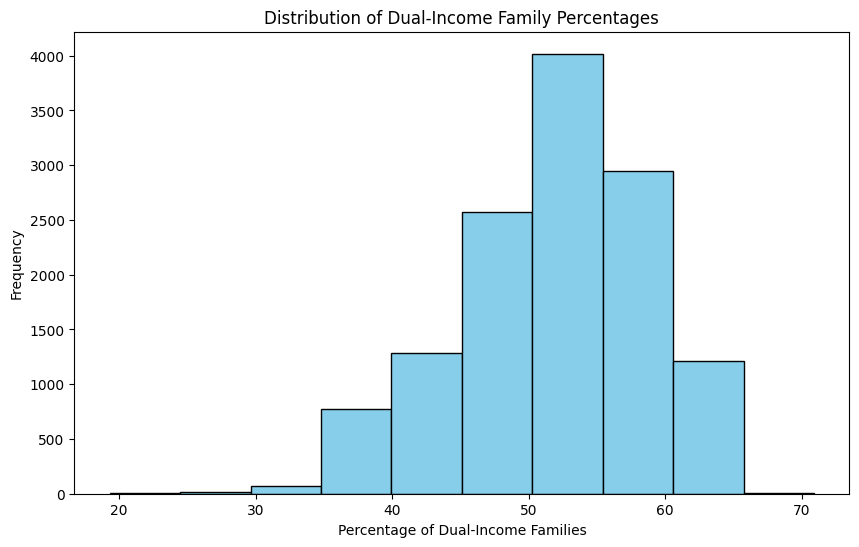

In [ ]:
# Plotting the distribution of dual-income percentages
plt.figure(figsize=(10, 6))
plt.hist(df['family_dual_income'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Dual-Income Family Percentages')
plt.xlabel('Percentage of Dual-Income Families')
plt.ylabel('Frequency')
plt.show()

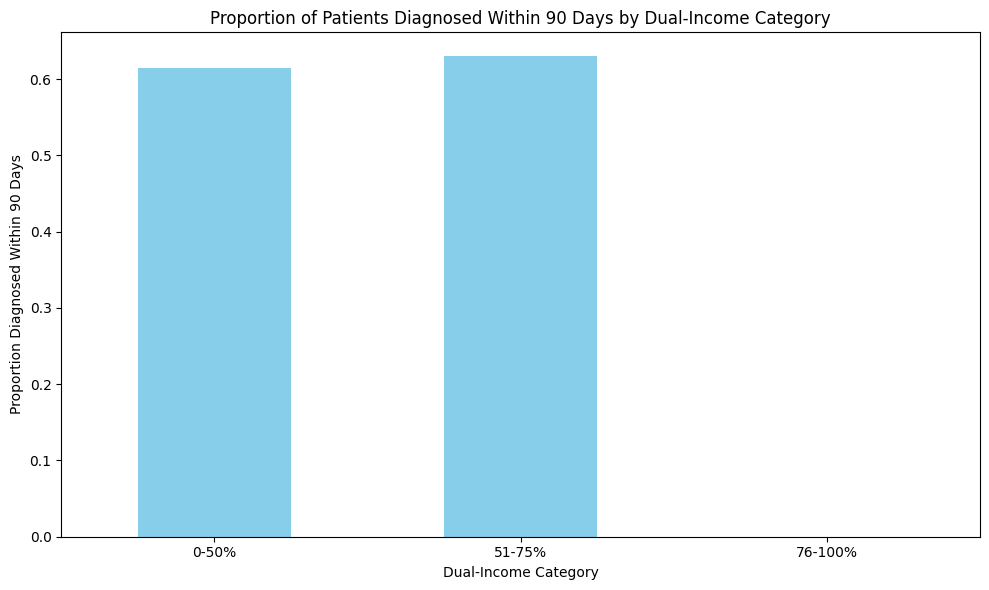

In [ ]:
# Define bins for dual income percentage (for example: 0-50%, 51-75%, 76-100%)
income_bins = [0, 50, 75, 100]
income_labels = ['0-50%', '51-75%', '76-100%']

# Categorize the dual income percentage into bins
df['Income_Category'] = pd.cut(df['family_dual_income'], bins=income_bins, labels=income_labels)

# Group by the income category and calculate the mean diagnosis period within 90 days
income_diagnosis_proportion = df.groupby('Income_Category')['DiagPeriodL90D'].mean()

# Plotting
plt.figure(figsize=(10, 6))
income_diagnosis_proportion.plot(kind='bar', color='skyblue')
plt.title('Proportion of Patients Diagnosed Within 90 Days by Dual-Income Category')
plt.xlabel('Dual-Income Category')
plt.ylabel('Proportion Diagnosed Within 90 Days')
plt.xticks(rotation=0)  # Rotation depends on the number of bins
plt.tight_layout()
plt.show()


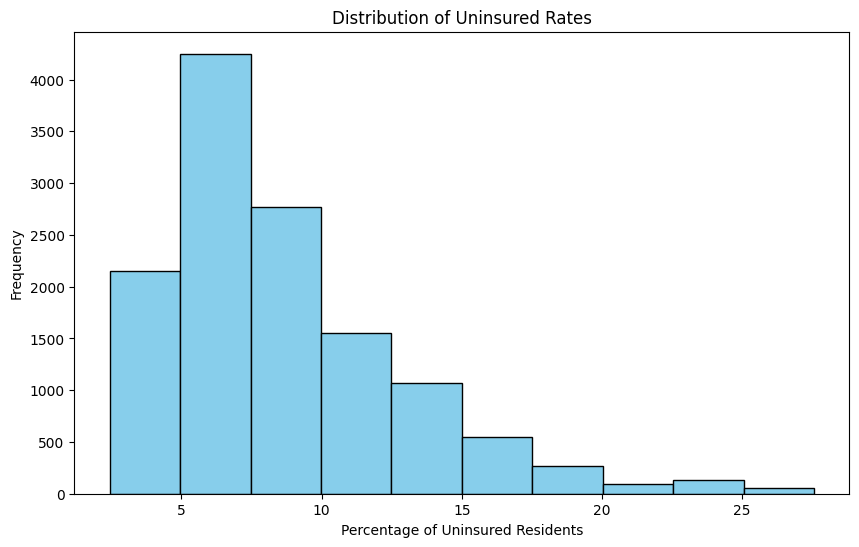

In [ ]:
# Plotting the distribution of uninsured percentages
plt.figure(figsize=(10, 6))
plt.hist(df['health_uninsured'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Uninsured Rates')
plt.xlabel('Percentage of Uninsured Residents')
plt.ylabel('Frequency')
plt.show()


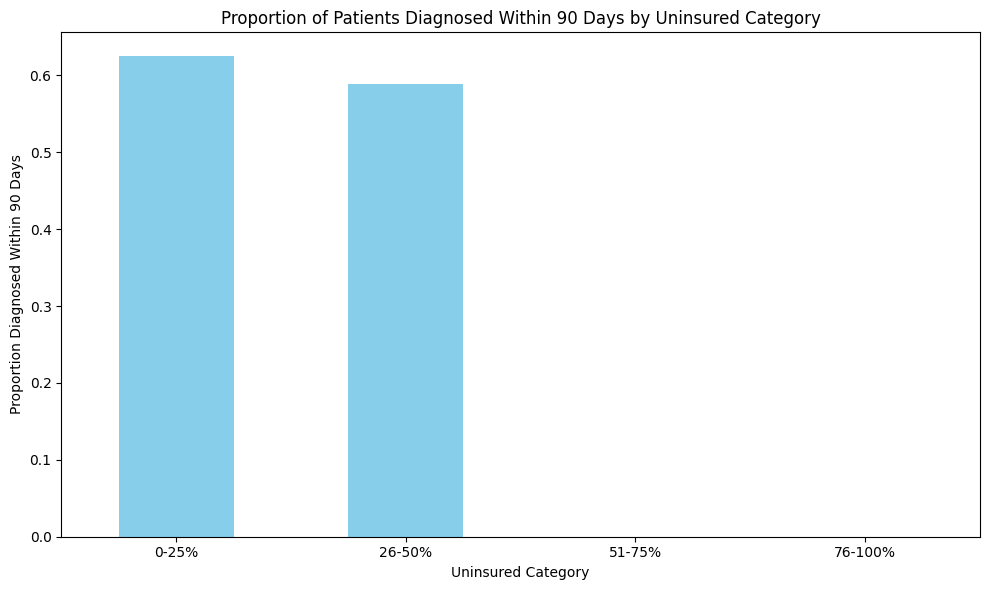

In [ ]:
# Example of defining bins for uninsured rates
uninsured_bins = [0, 25, 50, 75, 100]
uninsured_labels = ['0-25%', '26-50%', '51-75%', '76-100%']

# Categorize uninsured rates into bins
df['Uninsured_Category'] = pd.cut(df['health_uninsured'], bins=uninsured_bins, labels=uninsured_labels, include_lowest=True)

# Group by the uninsured category and calculate the mean diagnosis period within 90 days
uninsured_diagnosis_proportion = df.groupby('Uninsured_Category')['DiagPeriodL90D'].mean()

# Plotting
plt.figure(figsize=(10, 6))
uninsured_diagnosis_proportion.plot(kind='bar', color='skyblue')
plt.title('Proportion of Patients Diagnosed Within 90 Days by Uninsured Category')
plt.xlabel('Uninsured Category')
plt.ylabel('Proportion Diagnosed Within 90 Days')
plt.xticks(rotation=0)  # Adjust rotation as needed
plt.tight_layout()
plt.show()

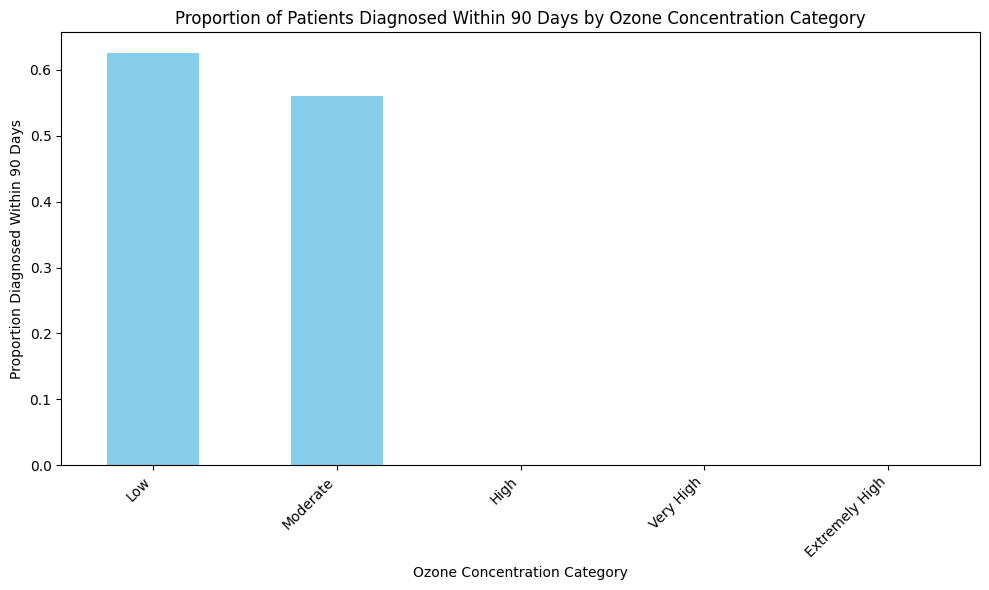

In [ ]:
# Example thresholds for ozone concentration categories (these are arbitrary and should be defined based on actual standards or research)
ozone_bins = [0, 50, 100, 150, 200, float('inf')]
ozone_labels = ['Low', 'Moderate', 'High', 'Very High', 'Extremely High']

# Categorize ozone concentrations into bins
df['Ozone_Category'] = pd.cut(df['Ozone'], bins=ozone_bins, labels=ozone_labels, include_lowest=True)

# Group by the ozone category and calculate the mean diagnosis period within 90 days
ozone_diagnosis_proportion = df.groupby('Ozone_Category')['DiagPeriodL90D'].mean()

# Plotting
plt.figure(figsize=(10, 6))
ozone_diagnosis_proportion.plot(kind='bar', color='skyblue')
plt.title('Proportion of Patients Diagnosed Within 90 Days by Ozone Concentration Category')
plt.xlabel('Ozone Concentration Category')
plt.ylabel('Proportion Diagnosed Within 90 Days')
plt.xticks(rotation=45, ha='right')  # Adjust rotation as needed
plt.tight_layout()
plt.show()


In [ ]:
# Assuming df is your original DataFrame
df_new = df.dropna()

print(df_new.head())
print(df_new.shape)

# Generate a heatmap of the correlation between features
corr = df_new.corr()

plt.figure(figsize=(50, 70))
sns.heatmap(corr, annot=True, cmap='coolwarm')  # Added a color map for better visualization
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

<Figure size 1000x600 with 0 Axes>

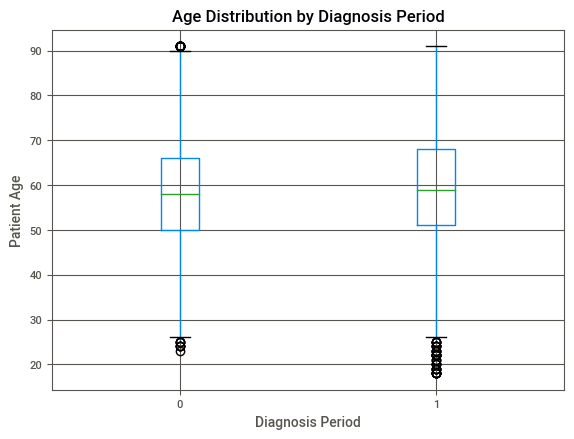

In [ ]:
#Box plot to find out patient age vs the target variable

plt.figure(figsize=(10, 6))  # Set the figure size as desired
df.boxplot(column='patient_age', by='DiagPeriodL90D')  # Create a boxplot

plt.title('Age Distribution by Diagnosis Period')
plt.suptitle('')  # Removes the default title
plt.xlabel('Diagnosis Period')
plt.ylabel('Patient Age')
plt.show()

In [ ]:
df_grouped = df.groupby(['payer_type', 'DiagPeriodL90D']).size().reset_index(name='count')

# Create the grouped bar chart
fig = px.bar(df_grouped, x='payer_type', y='count', color='DiagPeriodL90D',
             title='Distribution of Diagnosis Periods by Payer Type',
             labels={'count': 'Number of Diagnoses', 'payer_type': 'Payer Type'},
             barmode='group')

# Customize the layout for clarity
fig.update_layout(
    xaxis_title="Payer Type",
    yaxis_title="Number of Diagnoses",
    legend_title="Diagnosis Period",
    legend=dict(
        traceorder="reversed",
        title_font_family="Arial",
        itemsizing="constant",
        bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=2
    )
)

# Manually adjust the width of the bars
for trace in fig.data:
    trace['width'] = 0.4 # This is an example width, adjust as necessary

# Show the figure
fig.show()


Inference:

For COMMERCIAL insurance, there's a significant number of diagnoses made within 90 days, as indicated by the yellow part of the bar. However, the number of diagnoses made after 90 days (blue part) is also substantial.

For MEDICAID, the proportion of diagnoses made within 90 days appears to be lower than for COMMERCIAL insurance, with a larger proportion of diagnoses made after 90 days.

MEDICARE ADVANTAGE shows a relatively even distribution between diagnoses made within and after 90 days, but the total number of diagnoses is lower compared to COMMERCIAL and MEDICAID.

In [ ]:
# Create a boxplot to compare diagnosis periods
fig = px.box(df, x='metastatic_cancer_diagnosis_code', y='DiagPeriodL90D',
             color='metastatic_cancer_diagnosis_code',
             title='Diagnosis Periods by Metastatic Cancer Diagnosis Code',
             labels={'metastatic_cancer_diagnosis_code': 'Metastatic Cancer Diagnosis Code',
                     'DiagPeriodL90D': 'Diagnosis Period (Days)'})

# Show the figure
fig.show()

In [ ]:
fig = px.box(df, x='DiagPeriodL90D', y='bmi',
             title='Boxplot of BMI by Diagnosis Period',
             labels={'bmi': 'BMI', 'DiagPeriodL90D': 'Diagnosis Period'},
             color='DiagPeriodL90D')  # Color by diagnosis period for better visualization
fig.show()

In [ ]:
fig = px.violin(df, x='health_uninsured', y='DiagPeriodL90D',
                title='Violin Plot of Diagnosis Period by Health Insurance Status',
                labels={'DiagPeriodL90D': 'Diagnosis Period', 'health_uninsured': 'Health Insurance Status'},
                box=True,  # Include boxplot inside the violin plot
                points="all"  # Show individual data points
                )
fig.show()

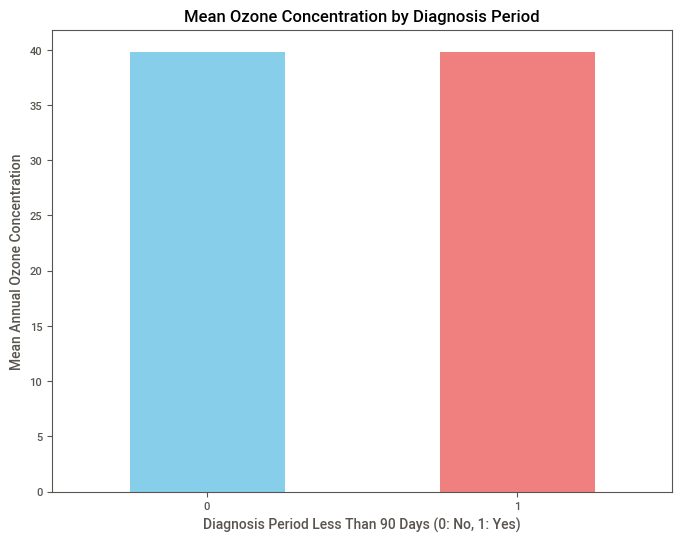

In [ ]:
mean_ozone_by_category = df.groupby('DiagPeriodL90D')['Ozone'].mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
mean_ozone_by_category.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title("Mean Ozone Concentration by Diagnosis Period")
plt.xlabel("Diagnosis Period Less Than 90 Days (0: No, 1: Yes)")
plt.ylabel("Mean Annual Ozone Concentration")
plt.xticks(rotation=0)
plt.show()

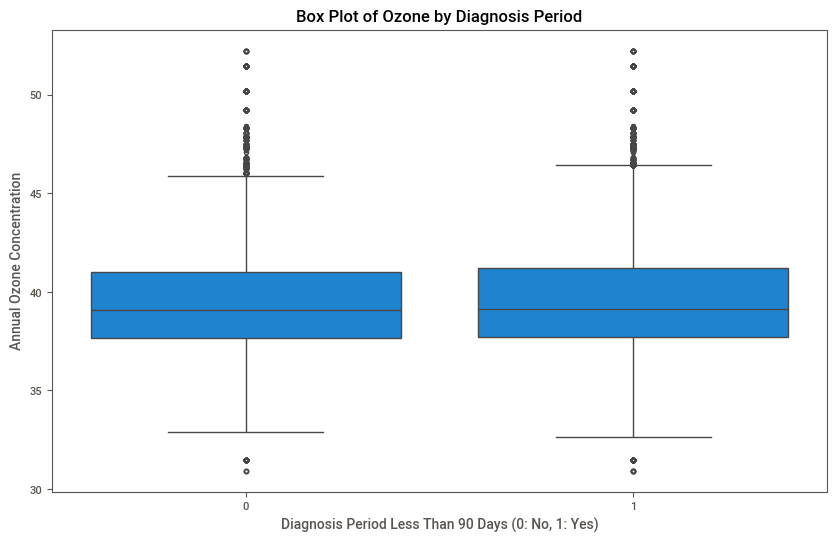

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x="DiagPeriodL90D", y="Ozone", data=df)
plt.title("Box Plot of Ozone by Diagnosis Period")
plt.xlabel("Diagnosis Period Less Than 90 Days (0: No, 1: Yes)")
plt.ylabel("Annual Ozone Concentration")
plt.show()

In [ ]:
null_values = df_new.isna().sum()

# Display the columns with null values (if any) and the count of null values in each column
print("Columns with Null Values:")
print(null_values[null_values > 0])


Columns with Null Values:
Series([], dtype: int64)


In [ ]:
df_new.shape

(1653, 81)

In [ ]:
target_counts = df_new["DiagPeriodL90D"].value_counts()

# Display the count of variables in each class of the target variable
print(target_counts)

1    975
0    678
Name: DiagPeriodL90D, dtype: int64



Target; DiagPeriodL90D
If DiagPeriodL90D is 1, it means that the diagnosis period was less than 90 days; in other words, the patient received a metastatic cancer diagnosis within 90 days following their screening.
If DiagPeriodL90D is 0, it means that the diagnosis period was not less than 90 days; the patient either received a metastatic cancer diagnosis after more than 90 days from screening, or did not receive a diagnosis within that time frame.
